## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej ($y$) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

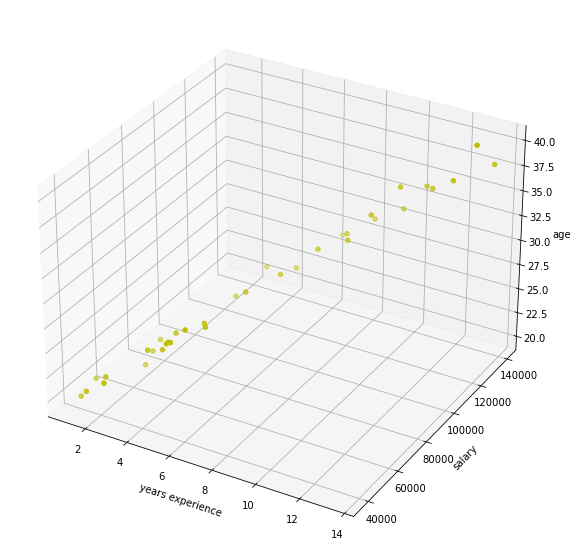

[[20]
 [21]
 [21]
 [22]
 [22]
 [22]
 [23]
 [24]
 [24]
 [24]
 [25]
 [25]
 [25]
 [25]
 [26]
 [26]
 [26]
 [27]
 [28]
 [29]
 [29]
 [29]
 [31]
 [31]
 [32]
 [32]
 [33]
 [34]
 [36]
 [34]
 [36]
 [36]
 [37]
 [40]
 [38]]


In [1]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import pylab
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import random

df = pd.read_csv('datasets/Salary.csv', sep=',')
yearsExperience = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
age = df['Age'].values.reshape(df['Age'].shape[0], 1)
salary = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(yearsExperience, salary, age, c='y', marker='o')
ax.set_xlabel('years experience')
ax.set_ylabel('salary')
ax.set_zlabel('age')
plt.show()
print(age)

## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

alpha =  0.0019375727937005448


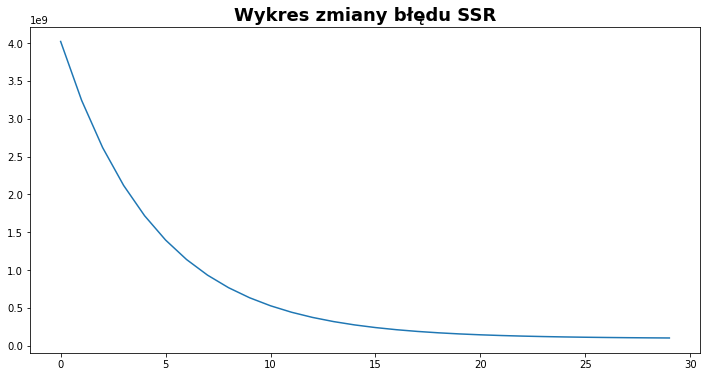

In [7]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''

def loadDataSalary(file):
    df = pd.read_csv('datasets/'+file, sep=',')
    yearsExperience = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
    age = df['Age'].values.reshape(df['Age'].shape[0], 1)
    salary = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
    m,n = yearsExperience.shape
    x0 = np.ones((m,1))
    X = np.hstack((x0, yearsExperience,age))
    return X, salary

def initialize(size):
    b0 = random.uniform(0, 1)
    b1 = random.uniform(0, 1)
    b2 = random.uniform(0, 1)
    alpha = random.uniform(0.0015, 0.0022)    
    return b0, b1, b2, alpha

def calculate_predict(b0, b1, b2, x1, x2):
    return b0 + (b1 * x1) + (b2 * x2)
    
def calculate_SSR(predykcja, Y):
    m = len(Y)
    suma = 0
    for i in range(m):
        suma += (predykcja[i] - Y[i])**2
    return (suma / (2 * m))[0]

def calculate_partial_derivatives(predykcja, Y, x1, x2):
    m = len(x1) 
    sum_d1 = 0
    sum_d2 = 0
    sum_d3 = 0
    for i in range(0, m):
        sum_d1 += predykcja[i] - Y[i]
        sum_d2 += (predykcja[i] - Y[i]) * x1[i]
        sum_d3 += (predykcja[i] - Y[i]) * x2[i]
    pochodna_b0 = sum_d1 / m
    pochodna_b1 = sum_d2 / m
    pochodna_b2 = sum_d3 / m
    return pochodna_b0, pochodna_b1, pochodna_b2
    
def recalculate_theta(b0, b1, b2, alpha, pochodna_b0, pochodna_b1, pochodna_b2):
    b0 -= (alpha * pochodna_b0)
    b1 -= (alpha * pochodna_b1)
    b2 -= (alpha * pochodna_b2)
    return b0[0], b1[0], b2[0]

def learn_and_fit(X, y):
    # YOUR CODE HERE
    beta0 = []
    betas = []
    error = []
    
    b0, b1, b2, alpha = initialize(len(X[0]))
    print("alpha = ",alpha)
    liczba_epok = 30
    for i in range(0, liczba_epok):
        predykcja = calculate_predict(b0, b1, b2, X[:,0], X[:,1])
        SSR = calculate_SSR(predykcja, y)
        pd_b0, pd_b1, pd_b2 = calculate_partial_derivatives(predykcja, y, X[:,0], X[:,1])
        b0, b1, b2 = recalculate_theta(b0, b1, b2, alpha, pd_b0, pd_b1, pd_b2)

        beta0.append(b0)
        betas.append(np.array([b0,b1,b2]))
        error.append(SSR)
    
    return beta0, betas, error

X, y = loadDataSalary("Salary.csv")
beta0, betas, error = learn_and_fit(X,y)
ax = plt.figure(figsize=(12,6)).add_subplot(111)
ax.set_title('Wykres zmiany błędu SSR', fontsize=18, fontweight='bold')
ax.plot(error)

### !!!!!!!!!!!
# alpha losowałęm z przedziału (0.0015, 0.0022), gdyż dane są nie wystarczajaco od 
# siebie zależne aby zwiększyć ten parametr i jednocześnie trzymać dobry rezultat


### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Stwórz 3 wykresy przedstawiające jak zmieniała się funkcja regresji na przestrzeni epok (pierwsza, środkowa, ostatnia epoka).

SSR =  4021352504.5547066


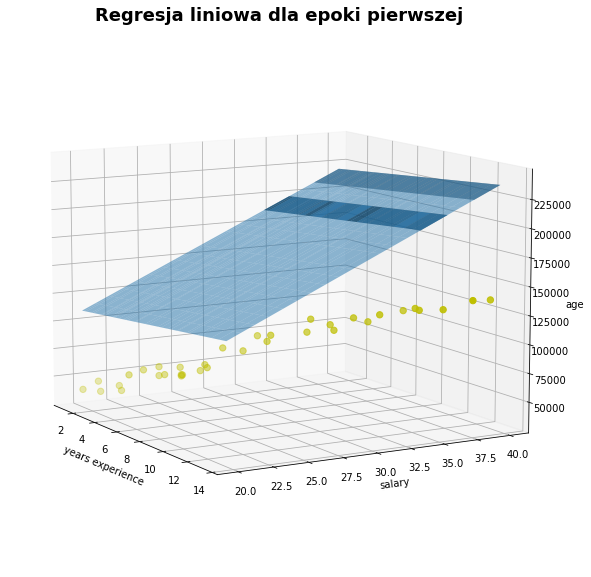

SSR =  53491066.76257496


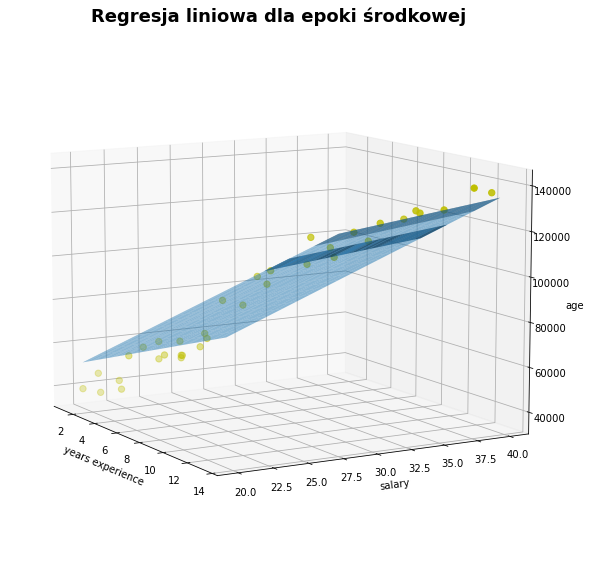

SSR =  32259889.14457907


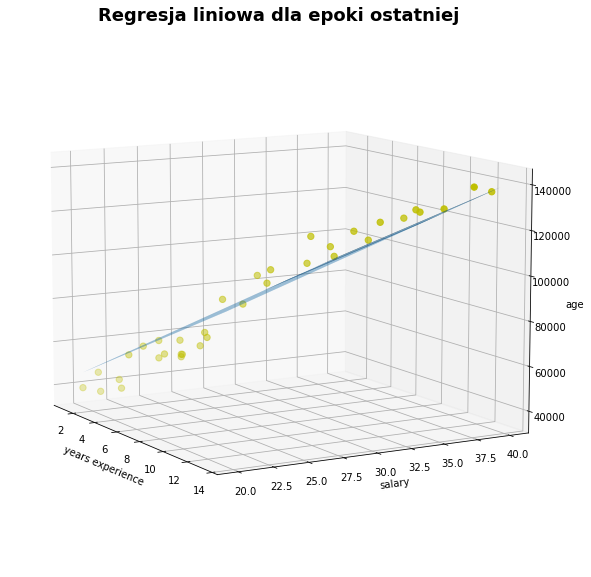

In [18]:
# YOUR CODE HERE
from mpl_toolkits.mplot3d import Axes3D
X, y = loadDataSalary("Salary.csv")
b0, b1, b2, alpha = initialize(len(X[0]))
liczba_epok = 80
betas = []
for i in range(0, liczba_epok):
    
    predykcja = calculate_predict(b0, b1, b2, X[:,0], X[:,1]) 
    SSR = calculate_SSR(predykcja, y)
    pd_b0, pd_b1, pd_b2 = calculate_partial_derivatives(predykcja, y, X[:,0], X[:,1])
    b0, b1, b2 = recalculate_theta(b0, b1, b2, alpha, pd_b0, pd_b1, pd_b2)
    
    if(i == 0 or i == liczba_epok/2 or i == liczba_epok-1):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('years experience')
        ax.set_ylabel('salary')
        ax.set_zlabel('age')
        if(i == 0):
            ax.set_title('Regresja liniowa dla epoki pierwszej', fontsize=18, fontweight='bold')
        if(i == liczba_epok/2):
            ax.set_title('Regresja liniowa dla epoki środkowej', fontsize=18, fontweight='bold')
        if(i == liczba_epok-1):
            ax.set_title('Regresja liniowa dla epoki ostatniej', fontsize=18, fontweight='bold')
        ax.scatter(yearsExperience, age, salary, s=40, c='y', marker='o')
        x1, x2 = np.meshgrid(yearsExperience, age)
        zz = b0 + b1 * x1 + b2 * x2
        ax.plot_surface(x1, x2, zz, alpha=0.5)
        ax.view_init(elev=10, azim=-30)
        print("SSR = ",SSR)
        pylab.show()
    

### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [32]:
# YOUR CODE HERE

def globalLoadData(file):
    df = pd.read_csv('datasets/'+file, sep=',')
    x1 = df['x1'].values.reshape(df['x1'].shape[0], 1)
    x2 = df['x2'].values.reshape(df['x2'].shape[0], 1)
    x3 = df['x3'].values.reshape(df['x3'].shape[0], 1)
    x4 = df['x4'].values.reshape(df['x4'].shape[0], 1)
    x5 = df['x5'].values.reshape(df['x5'].shape[0], 1)
    x6 = df['x6'].values.reshape(df['x6'].shape[0], 1)
    Y = df['y'].values.reshape(df['y'].shape[0], 1)
    m,n = x1.shape
    x0 = np.ones((m,1))
    X = np.hstack((x0,x1,x2,x3,x4,x5,x6))
    return X, Y

def globalInitialize(size, alphaFrom, alphaTo):
    theta = [random.uniform(0,1) for _ in range(size)]
    alpha = random.uniform(alphaFrom, alphaTo)
    return theta, alpha

def globalCalculate_predict(theta, X):
    return np.dot(X,theta)

def globalCalculate_SSR(predict, Y):
    m = len(Y)
    suma = 0
    for i in range(m):
        suma += (predict[i] - Y[i])**2
    return (suma / (2 * m))[0]

def globalCalculate_partial_derivatives(predykcja, Y, X):
    m,n = X.shape
    sum_d = [0] * n
    pochodne_theta = [0] * n
    for i in range(m):
        for j in range(len(sum_d)):
            sum_d[j] += (predykcja[i] - Y[i]) * X[i][j]
    for i in range(len(pochodne_theta)):
        pochodne_theta[i] = sum_d[i] / m
    return pochodne_theta
    
def globalRecalculate_theta(theta, alpha, pochodne_theta):
    for i in range(len(theta)):
        theta[i] -= (alpha * pochodne_theta[i])
    return theta

def globalLearn_and_fit(X, y):
    # YOUR CODE HERE
    betas = []
    error = []

    theta, alpha = globalInitialize(len(X[0]), 0.5, 1)
    liczba_epok = 100
    for i in range(1, liczba_epok):
        predykcja = globalCalculate_predict(theta, X)  
        SSR = globalCalculate_SSR(predykcja, y)
        pochodne_theta = globalCalculate_partial_derivatives(predykcja, y, X)
        theta = globalRecalculate_theta(theta, alpha, pochodne_theta)

        betas.append(theta)
        error.append(SSR)
    
    return betas, error

X, y = globalLoadData("multi_variable_regression.csv")
betas, error = globalLearn_and_fit(X,y)

### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

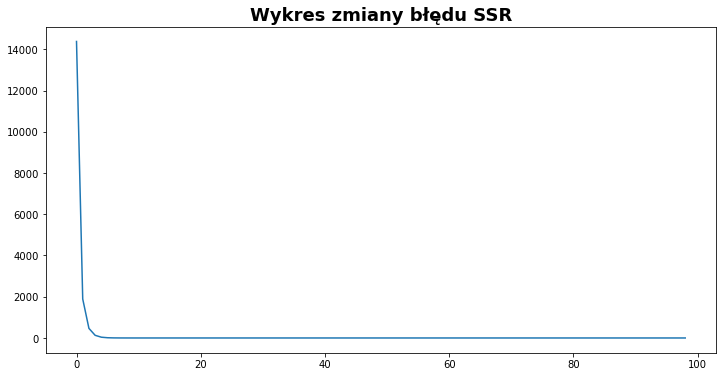

In [34]:
# YOUR CODE HERE
x, y = globalLoadData("multi_variable_regression.csv")
betas, err = globalLearn_and_fit(x,y)
ax = plt.figure(figsize=(12,6)).add_subplot(111)
ax.set_title('Wykres zmiany błędu SSR', fontsize=18, fontweight='bold')
plt.plot(err)

\# YOUR ANSWER HERE

Wykres sugeruję że badane dane są wysoce od sibie zależne i nawet zwiększenie parametru alpha (większy skok przy obliczaniu gradiendu) nie powoduje nieprawidłowości.

Dodatkowo w ramach testów można wywnioskować, iż model osiąga optymalne wartości już przy 60 epoce dla alpha ustawionego z przedzialu (0.5, 1) i SSR wynosi ok. 1290.

Natomiast dla niskich wskazań alpha (0, 0.01) model przestaje znacząco poprawiać swoje wartości przy ok 5000 epoce, a SSR wynosi w tedy w przybliżeniu 1100.